<a href="https://colab.research.google.com/github/ratul41907/Deep-Learning-Project-CIFAR-10-Image-Classifier/blob/main/IMAGE_CLASSIFIER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Introduction**

####**CIFAR-10**

CIFAR-10 is an image classification dataset which is used in deep learning models. It contains 60000 color images of size 32x32 pixels with channels and 10 different classes

####**Project Goal**

The goal is to build a Deep learning model using fully dense connected neural network to classify images into one of the 10 classes given in dataset.

####**Approach and Overview**

Load the CIFAR-10 dataset fro tensorflow. Process the data- normalize pixel values, then flatten each image into a 1D vector, theencode labels with one hot. After that we will build a neural network with multiple hidden layers, using batch normalization, softmax. Then we will train the model with a validation spliy. We would find accuracy and loss for training and validation. At the end we would evaluate the model on the test set and interpret results.

# **2. Data Loading and Preprocessing**

####**Import Dataset**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Flatten
from tensorflow.keras.optimizers import Adam


# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

# CIFAR-10 class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step
x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


####**Visualization of Samples**

/tmp/ipython-input-1176309406.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(class_names[int(y_train[i])])


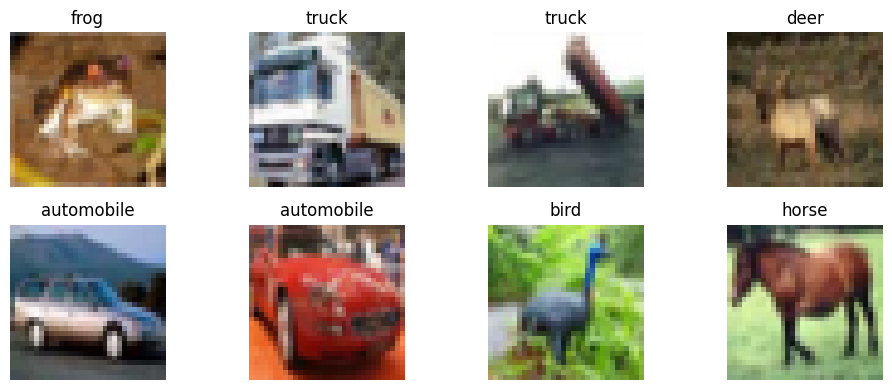

In [2]:
plt.figure(figsize=(10, 4))
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(x_train[i])
    plt.title(class_names[int(y_train[i])])
    plt.axis('off')

plt.tight_layout()
plt.show()


####**Normalization and Correct Label Encoding**

In [3]:
#Normalize pixel values to [0, 1]
x_train_norm = x_train.astype('float32') / 255.0
x_test_norm = x_test.astype('float32') / 255.0

#Flatten images
num_train = x_train_norm.shape[0]
num_test = x_test_norm.shape[0]

x_train_flat = x_train_norm.reshape(num_train, -1)
x_test_flat = x_test_norm.reshape(num_test, -1)

print("Flattened x_train shape:", x_train_flat.shape)
print("Flattened x_test shape:", x_test_flat.shape)

#ne hot encode labels
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

print("One-hot y_train shape:", y_train_cat.shape)
print("One-hot y_test shape:", y_test_cat.shape)


Flattened x_train shape: (50000, 3072)
Flattened x_test shape: (10000, 3072)
One-hot y_train shape: (50000, 10)
One-hot y_test shape: (10000, 10)


# **3. Model Architecture**

In [4]:
#dense model
input_dim = x_train_flat.shape[1]  # 3072

model = Sequential()

#First hidden layer
model.add(Dense(512, activation='relu', input_shape=(input_dim,)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

#Second hidden layer
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

#Third hidden layer
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))


#Output layer, 10 classes with softmax
model.add(Dense(10, activation='softmax'))

# Show model summary
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,742,474 (6.65 MB)

 Trainable params: 1,740,682 (6.64 MB)

 Non-trainable params: 1,792 (7.00 KB)

# **4. Training Process**

In [5]:
#Compile & Train

model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(),
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    x_train_flat, y_train_cat,
    validation_split=0.2,   # 20% of training data as validation
    epochs=15,              # between 10–20
    batch_size=64,
    verbose=1
)


Epoch 1/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.2561 - loss: 2.2636 - val_accuracy: 0.3410 - val_loss: 1.8825
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 33ms/step - accuracy: 0.3614 - loss: 1.7814 - val_accuracy: 0.3774 - val_loss: 1.7309
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.3899 - loss: 1.7027 - val_accuracy: 0.3931 - val_loss: 1.6963
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - accuracy: 0.4054 - loss: 1.6752 - val_accuracy: 0.3936 - val_loss: 1.6785
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.4125 - loss: 1.6488 - val_accuracy: 0.4103 - val_loss: 1.6343
Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - accuracy: 0.4153 - loss: 1.6300 - val_accuracy: 0.4108 - val_loss: 1.6423
Epoch 7/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 33ms/step - accuracy: 0.4198 - loss: 1.6154 - val_accuracy: 0.4251 - val_loss: 1.6167
Epoch 8/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.4251 - loss: 1.6049 - 

# **5.Plots and Visualization**

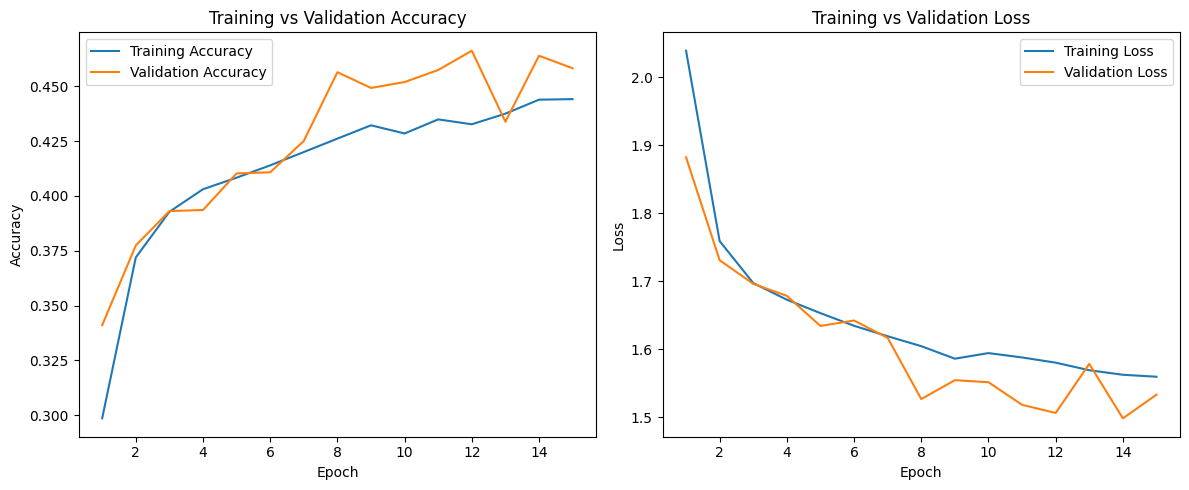

In [6]:

# Retrieve metrics from history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()


# **6. Final Evaluation**

In [7]:
#Final Evaluation on Test Set

test_loss, test_accuracy = model.evaluate(x_test_flat, y_test_cat, verbose=0)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Test Loss: 1.5149
Test Accuracy: 0.4606


####**Predictions**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


/tmp/ipython-input-1079458291.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  true_label = class_names[int(y_true[i])]


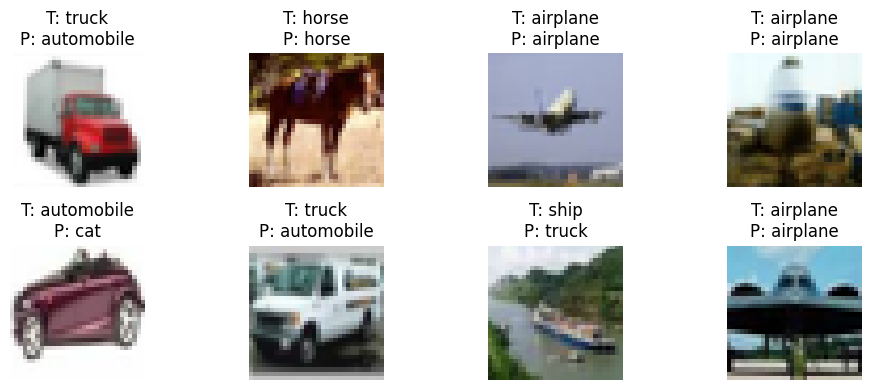

In [8]:
num_samples = 8
indices = np.random.choice(len(x_test), num_samples, replace=False)

x_sample = x_test_norm[indices]         # normalized images in 4D
x_sample_flat = x_test_flat[indices]    # flattened for model
y_true = y_test[indices]

y_pred_probs = model.predict(x_sample_flat)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

plt.figure(figsize=(10, 4))
for i in range(num_samples):
    plt.subplot(2, 4, i + 1)
    plt.imshow(x_sample[i])
    true_label = class_names[int(y_true[i])]
    pred_label = class_names[int(y_pred_classes[i])]
    plt.title(f"T: {true_label}\nP: {pred_label}")
    plt.axis('off')

plt.tight_layout()
plt.show()


####**Interpretation**

The Dense Neural Network model trained on the CIFAR-10 dataset achieved a test accuracy of around 0.046

Overall, this project demonstrates the full pipeline of loading and preprocessing a real-world image dataset, building a deep Dense Neural Network with BatchNorm & Dropout, training with validation, plotting metrics, and evaluating on a held-out test set.